<a href="https://colab.research.google.com/github/Abhilash1001/Thesis_Work/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
df1 = pd.read_csv('DT_Test.csv')
df1

,koi_score,koi_disposition,target
0,1.000,CONFIRMED,0
1,0.969,CONFIRMED,0
2,0.000,FALSE POSITIVE,1
3,1.000,CONFIRMED,0
4,1.000,CONFIRMED,0
...,...,...,...
7141,0.008,FALSE POSITIVE,1
7142,0.000,FALSE POSITIVE,1
7143,0.000,FALSE POSITIVE,1
7144,0.021,FALSE POSITIVE,1


In [ ]:
df1.mean(axis = 0)

koi_score    0.377914
target       0.677302
dtype: float64

In [ ]:
df1.fillna(df1.mean())
df1=df1.fillna(df1.mean())

In [ ]:
X = df1.drop(["koi_disposition","target"], axis=1).values
y = df1["target"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print(classifier.predict(sc.transform([[0.001]])))

[1]


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 645   19]
 [  46 1434]]


0.9696828358208955

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       664
           1       0.99      0.97      0.98      1480

    accuracy                           0.97      2144
   macro avg       0.96      0.97      0.96      2144
weighted avg       0.97      0.97      0.97      2144



In [ ]:
#Computing AUC Score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.97


In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

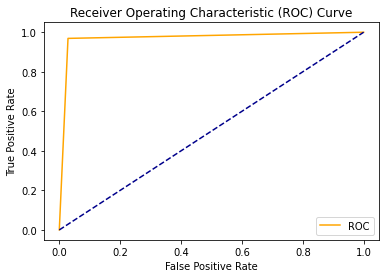

In [ ]:
#Calculating ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)